In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns
import missingno as msno
import os
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df_titanic = pd.read_csv('train.csv')
df_titanic_test = pd.read_csv('tested.csv')

In [3]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_titanic_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#check nulls
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\gimep\AppData\Local\Temp\ipykernel_12556\1348979053.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_titanic.corr(), annot=True, cmap=('Blues'));


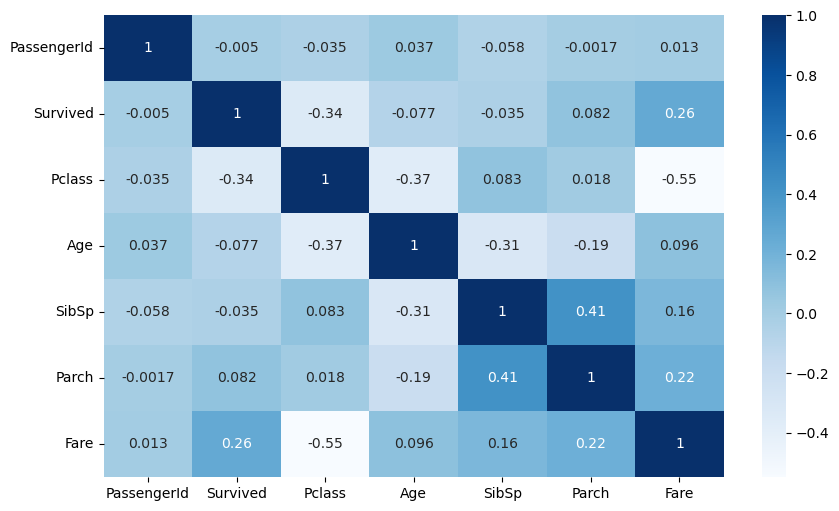

In [8]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_titanic.corr(), annot=True, cmap=('Blues'));

In [9]:
Sex_values = df_titanic['Sex'].value_counts()
Sex_values

male      577
female    314
Name: Sex, dtype: int64

In [10]:
# function to show percentage of count
def show_percentage(dataframe, feature_count):
    total = len(dataframe)
    for i in range(feature_count.shape[0]):
        count=feature_count[i]
        percentage = '{:0.2f}%'.format(100 * count/total)
        plt.text(i, count+10, percentage, ha='center', color='blue', fontsize=12)

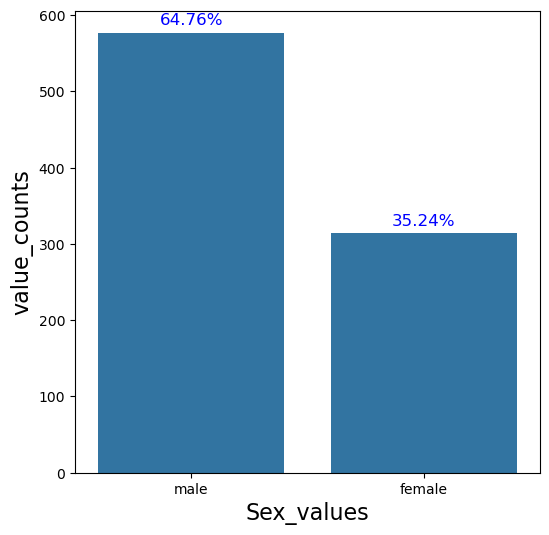

In [11]:
#visualizing "Sex"
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data = df_titanic, order=Sex_values.index)
show_percentage(df_titanic, Sex_values)
plt.xlabel('Sex_values', fontsize=16)
plt.ylabel('value_counts', fontsize=16)
plt.show()

In [12]:
Survived_values = df_titanic['Survived'].value_counts()
Survived_values

0    549
1    342
Name: Survived, dtype: int64

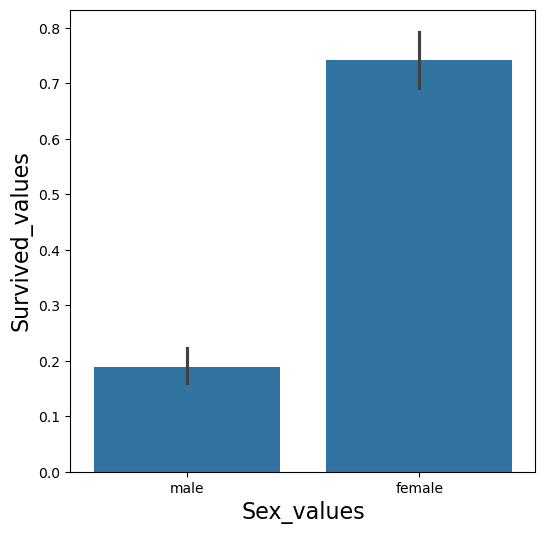

In [13]:
#visualizing "Sex vs Survived"
plt.figure(figsize=(6,6))
sns.barplot(data = df_titanic , x = 'Sex' , y = "Survived")
#show_percentage(df_titanic, Sex_values)
plt.xlabel('Sex_values', fontsize=16)
plt.ylabel('Survived_values', fontsize=16)
plt.show()

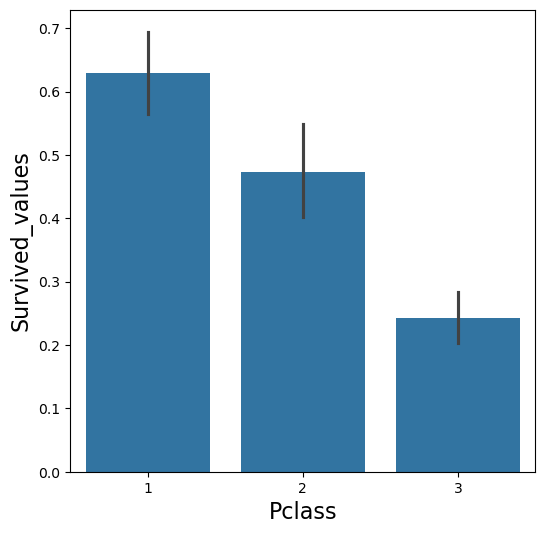

In [14]:
plt.figure(figsize=(6,6))
sns.barplot(data = df_titanic , x = 'Pclass' , y = "Survived")
plt.xlabel('Pclass', fontsize=16)
plt.ylabel('Survived_values', fontsize=16)
plt.show()

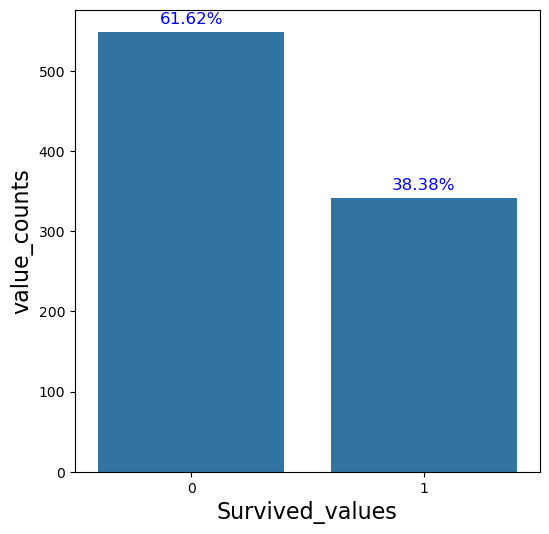

In [15]:
#visualizing "Survived"
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', data = df_titanic, order=Survived_values.index)
show_percentage(df_titanic, Survived_values)
plt.xlabel('Survived_values', fontsize=16)
plt.ylabel('value_counts', fontsize=16)
plt.show()

In [16]:
df_titanic['Age'].max(), df_titanic['Age'].min()

(80.0, 0.42)

<Axes: xlabel='Age', ylabel='count'>

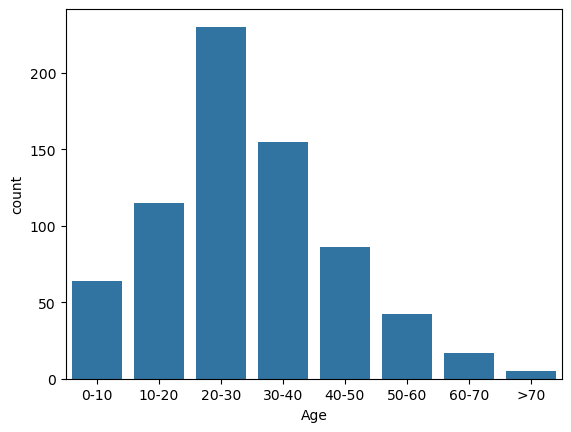

In [17]:
#convert "Age_train" to group
Age_groups = pd.cut(x=df_titanic['Age'], bins=[-np.inf, 10, 20, 30, 40, 50, 60, 70, np.inf], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '>70'])
sns.countplot(x=Age_groups)

C:\Users\gimep\AppData\Local\Temp\ipykernel_12556\2181859130.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(data = df_titanic , x = df_titanic['Survived'] , hue = Age_groups).set(xticklabels=['unservived', 'servived'])


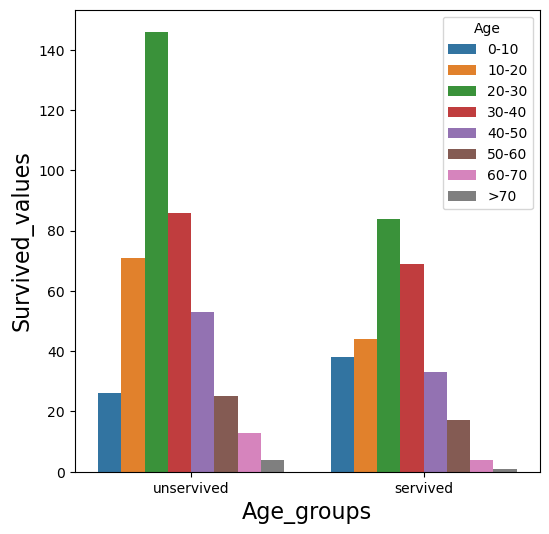

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(data = df_titanic , x = df_titanic['Survived'] , hue = Age_groups).set(xticklabels=['unservived', 'servived'])
#show_percentage(df_titanic, Sex_values)
plt.xlabel('Age_groups', fontsize=16)
plt.ylabel('Survived_values', fontsize=16)
plt.show()

In [19]:
## Train data set

features = df_titanic.drop(['Survived', 'Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1) #features
target = df_titanic['Survived'] #target

In [20]:
x_train,x_test, y_train, y_test = train_test_split(features, target, test_size=.15, random_state=123)

In [21]:
# numerical and category for train dataset
numerical_cols_train=[col for col in x_train.columns if x_train[col].dtype in ['float64', 'float32', 'int64', 'int32']]
category_cols_train=[col for col in x_train.columns if x_train[col].dtype not in ['float64', 'float32', 'int64', 'int32']]

In [22]:
# numerical and category for test dataset
numerical_cols_test=[col for col in x_test.columns if x_test[col].dtype in ['float64', 'float32', 'int64', 'int32']]
category_cols_test=[col for col in x_test.columns if x_test[col].dtype not in ['float64', 'float32', 'int64', 'int32']]

In [23]:
numerical_cols_train, category_cols_train

(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], ['Sex', 'Embarked'])

In [24]:
numerical_cols_train.remove('Pclass')
numerical_cols_train.remove('SibSp')
numerical_cols_train.remove('Parch')

In [25]:
numerical_cols_test, category_cols_test

(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], ['Sex', 'Embarked'])

In [26]:
numerical_cols_test.remove('Pclass')
numerical_cols_test.remove('SibSp')
numerical_cols_test.remove('Parch')

In [27]:
## standardization and labelling for train and test for train dataset

# impute nulls 
imputer = SimpleImputer(strategy='median')
x_train_im = imputer.fit_transform(x_train[numerical_cols_train])
x_test_im = imputer.transform(x_test[numerical_cols_train])

# standardization
scalar = StandardScaler()
x_train_sc= scalar.fit_transform(x_train_im)
x_test_sc = scalar.transform(x_test_im)

In [28]:
# Label encoding
imputer_catg = SimpleImputer(strategy='constant', fill_value=df_titanic['Sex'].mode())
x_train_imput_0 = imputer_catg.fit_transform(x_train[category_cols_train].values[:, 0].reshape(-1,1))
x_test_impuet_0 = imputer_catg.transform(x_test[category_cols_train].values[:, 0].reshape(-1,1))

x_train_imput_0 = x_train_imput_0.ravel()
x_test_impuet_0 = x_test_impuet_0.ravel()

lbencd = LabelEncoder()
x_train_encd_0 = lbencd.fit_transform(x_train_imput_0)
x_test_encd_0 = lbencd.transform(x_test_impuet_0)


imputer_catg = SimpleImputer(strategy='constant', fill_value=df_titanic['Embarked'].mode())
x_train_imput_1 = imputer_catg.fit_transform(x_train[category_cols_train].values[:, 1].reshape(-1,1))
x_test_imput_1 = imputer_catg.transform(x_test[category_cols_train].values[:, 1].reshape(-1,1))

x_train_imput_1 = x_train_imput_1.ravel()
x_test_imput_1 = x_test_imput_1.ravel()

lbencd = LabelEncoder()
x_train_encd_1 = lbencd.fit_transform(x_train_imput_1)
x_test_encd_1 = lbencd.transform(x_test_imput_1)

In [29]:
x_train_encd = np.c_[x_train_encd_0, x_train_encd_1]
x_test_encd = np.c_[x_test_encd_0, x_test_encd_1]

x_train_encd = np.c_[x_train_encd, x_train['SibSp']]
x_train_encd = np.c_[x_train_encd, x_train['Parch']]
x_train_encd = np.c_[x_train_encd, x_train['Pclass']]
x_train_encd

array([[0, 2, 0, 0, 1],
       [1, 2, 0, 0, 3],
       [0, 0, 0, 1, 1],
       ...,
       [1, 2, 0, 0, 3],
       [1, 2, 0, 0, 3],
       [1, 1, 0, 0, 3]], dtype=int64)

In [30]:
x_test_encd = np.c_[x_test_encd, x_test['SibSp']]
x_test_encd = np.c_[x_test_encd, x_test['Parch']]
x_test_encd = np.c_[x_test_encd, x_test['Pclass']]
x_test_encd

array([[0, 2, 1, 1, 3],
       [1, 0, 0, 0, 3],
       [1, 0, 0, 0, 1],
       [1, 2, 0, 0, 1],
       [1, 0, 1, 0, 3],
       [1, 2, 0, 0, 2],
       [0, 2, 0, 0, 2],
       [0, 2, 1, 0, 2],
       [0, 0, 0, 1, 3],
       [0, 2, 0, 4, 3],
       [0, 2, 2, 2, 3],
       [0, 2, 0, 0, 3],
       [0, 2, 1, 1, 1],
       [1, 2, 0, 0, 3],
       [0, 0, 0, 0, 1],
       [0, 0, 2, 1, 3],
       [0, 0, 0, 0, 1],
       [1, 2, 0, 0, 1],
       [0, 2, 1, 4, 3],
       [1, 2, 1, 0, 2],
       [0, 2, 1, 2, 3],
       [0, 2, 0, 2, 2],
       [1, 2, 0, 0, 2],
       [1, 1, 4, 1, 3],
       [1, 2, 4, 1, 3],
       [1, 2, 1, 0, 3],
       [1, 2, 0, 0, 3],
       [0, 0, 1, 0, 1],
       [1, 2, 0, 0, 3],
       [1, 1, 0, 0, 3],
       [0, 2, 3, 2, 3],
       [0, 2, 1, 1, 2],
       [1, 2, 0, 0, 2],
       [1, 2, 0, 0, 3],
       [1, 2, 1, 1, 2],
       [1, 0, 0, 0, 3],
       [1, 2, 0, 0, 3],
       [1, 2, 0, 0, 3],
       [0, 2, 0, 0, 2],
       [1, 0, 0, 0, 1],
       [0, 2, 1, 2, 1],
       [1, 0, 2,

In [31]:
x_train_final,  x_test_final= np.c_[x_train_sc, x_train_encd], np.c_[x_test_sc, x_test_encd]

In [32]:
x_train_final[0]

array([ 1.44168846, -0.12277488,  0.        ,  2.        ,  0.        ,
        0.        ,  1.        ])

In [33]:
x_test_final[0]

array([-2.2163014 , -0.40934819,  0.        ,  2.        ,  1.        ,
        1.        ,  3.        ])

In [34]:
s_0, s_1 = len(df_titanic[df_titanic['Survived'] == 0]), len(df_titanic[df_titanic['Survived'] == 1])
s_0, s_1

w_0, w_1 = s_0/(s_0 + s_1), s_1/(s_0 + s_1)
w_0, w_1

w_0, w_1 = w_1, w_0 
w_0, w_1

(0.3838383838383838, 0.6161616161616161)

In [35]:
PassengerId = df_titanic_test['PassengerId']

In [36]:
## Test dataset

df_titanic_test = df_titanic_test.drop(['Survived', 'PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)

In [37]:
# numerical and category for train dataset
numerical_cols=[col for col in df_titanic_test.columns if df_titanic_test[col].dtype in ['float64', 'float32', 'int64', 'int32']]
category_cols=[col for col in df_titanic_test.columns if df_titanic_test[col].dtype not in ['float64', 'float32', 'int64', 'int32']]

numerical_cols.remove('Pclass')
numerical_cols.remove('SibSp')
numerical_cols.remove('Parch')

numerical_cols, category_cols

(['Age', 'Fare'], ['Sex', 'Embarked'])

## standardization and labelling for train and test for train dataset

In [38]:
# impute nulls 
imputer_test = SimpleImputer(strategy='median')
x_tstdst_im = imputer_test.fit_transform(df_titanic_test[numerical_cols])

# standardization
scalar_test = StandardScaler()
x_tstdst_sc= scalar_test.fit_transform(x_tstdst_im)

# Label encoding
imputer_catg_test = SimpleImputer(strategy='constant', fill_value=df_titanic['Sex'].mode())
x_tstdst_imput_0 = imputer_catg_test.fit_transform(df_titanic_test[category_cols].values[:, 0].reshape(-1,1))

x_tstdst_imput_0 = x_tstdst_imput_0.ravel()

lbencd_test = LabelEncoder()
x_tstdst_encd_0 = lbencd_test.fit_transform(x_tstdst_imput_0)

imputer_catg_test = SimpleImputer(strategy='constant', fill_value=df_titanic_test['Embarked'].mode())
x_tstdst_imput_1 = imputer_catg_test.fit_transform(df_titanic_test[category_cols].values[:, 1].reshape(-1,1))

x_tstdst_imput_1 = x_tstdst_imput_1.ravel()

lbencd_test = LabelEncoder()
x_tstdst_encd_1 = lbencd_test.fit_transform(x_tstdst_imput_1)

In [39]:
x_tstdst_encd = np.c_[x_tstdst_encd_0, x_tstdst_encd_1]

x_tstdst_encd = np.c_[x_tstdst_encd, df_titanic_test['SibSp']]
x_tstdst_encd = np.c_[x_tstdst_encd, df_titanic_test['Parch']]
x_tstdst_encd = np.c_[x_tstdst_encd, df_titanic_test['Pclass']]
x_tstdst_encd

array([[1, 1, 0, 0, 3],
       [0, 2, 1, 0, 3],
       [1, 1, 0, 0, 2],
       ...,
       [1, 2, 0, 0, 3],
       [1, 2, 0, 0, 3],
       [1, 0, 1, 1, 3]], dtype=int64)

In [40]:
x_tstdst_final = np.c_[x_tstdst_sc, x_tstdst_encd]
x_tstdst_final.shape

(418, 7)

## RandomForestClassifier Model

In [41]:
rand_frt_clf=RandomForestClassifier(n_estimators=67, max_depth=9, 
                                    class_weight={0:w_0, 1:w_1}, random_state=42)
rand_frt_clf.fit(x_train_final,y_train)

RandomForestClassifier(class_weight={0: 0.3838383838383838,
                                     1: 0.6161616161616161},
                       max_depth=9, n_estimators=67, random_state=42)

In [42]:
y_rand_frt_clf_score = cross_val_score(estimator=rand_frt_clf, X=x_train_final, y=y_train, cv=5, scoring='accuracy')
y_rand_frt_clf_score

array([0.85526316, 0.80263158, 0.78807947, 0.84768212, 0.82119205])

In [43]:
print(y_rand_frt_clf_score.mean())
print(y_rand_frt_clf_score.std())

0.8229696758452422
0.025642536607139995


In [44]:
rand_frt_clf_Pred_train = cross_val_predict(estimator=rand_frt_clf, X=x_train_final, y=y_train, cv=5)
rand_frt_clf_Pred_train

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [45]:
accuracy_score(y_train, rand_frt_clf_Pred_train)

0.8229854689564069

In [46]:
confmx_rand_frt_clf = confusion_matrix(y_train, rand_frt_clf_Pred_train)
confmx_rand_frt_clf

array([[400,  58],
       [ 76, 223]], dtype=int64)

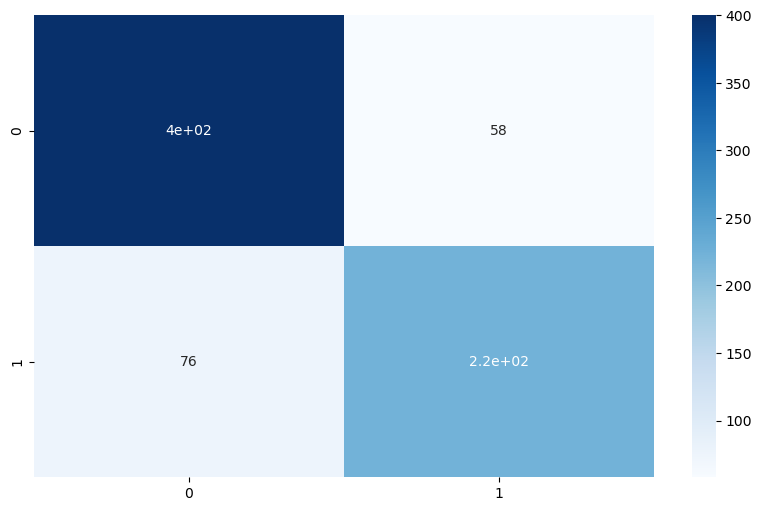

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(confmx_rand_frt_clf, annot=True, cmap='Blues')
plt.show()

In [48]:
## predict test dataset

rand_frt_Pred_test = rand_frt_clf.predict(X=x_test_final)
rand_frt_Pred_test

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [49]:
accuracy_score(y_test, rand_frt_Pred_test)

0.8432835820895522

In [50]:
confmx_rand_frt_clf_test = confusion_matrix(y_test, rand_frt_Pred_test)
confmx_rand_frt_clf_test

array([[77, 14],
       [ 7, 36]], dtype=int64)

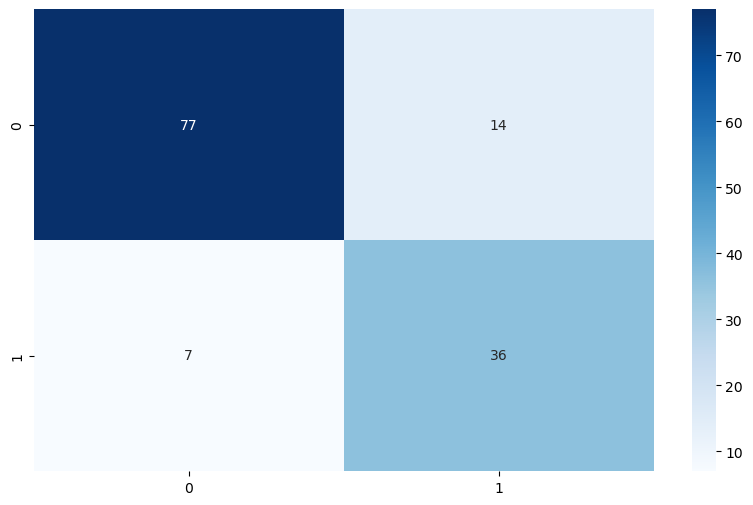

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(confmx_rand_frt_clf_test, annot=True, cmap='Blues')
plt.show()

## Predict Test dataset from Kaggle

In [52]:
rand_frt_Pred_test_final = rand_frt_clf.predict(X=x_tstdst_final)
rand_frt_Pred_test_final

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

## XGBOOST Model

In [53]:
xgbc =xgb.XGBClassifier(use_label_encoder=False, n_estimators=50, max_depth=9, objective='binary:logistic', 
                        eval_metric = "logloss", learning_rate=0.0238)
xgbc.fit(x_train_final, y_train)

C:\Users\gimep\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0238, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [54]:
xgbc_acc_scores = cross_val_score(estimator=xgbc, X=x_train_final, y=y_train, cv=5, scoring='accuracy')
xgbc_acc_scores

C:\Users\gimep\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\gimep\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\gimep\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\gimep\anaconda3\lib\site-packages\

array([0.84210526, 0.80921053, 0.75496689, 0.82781457, 0.83443709])

In [55]:
print(xgbc_acc_scores.mean())
print(xgbc_acc_scores.std())

0.8137068665040083
0.03132360272945305


In [56]:
xgbc_Pred = cross_val_predict(estimator=xgbc, X=x_train_final, y=y_train, cv=5)
xgbc_Pred

C:\Users\gimep\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\gimep\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [57]:
confmx_clf = confusion_matrix(y_train, xgbc_Pred)
confmx_clf

array([[420,  38],
       [103, 196]], dtype=int64)

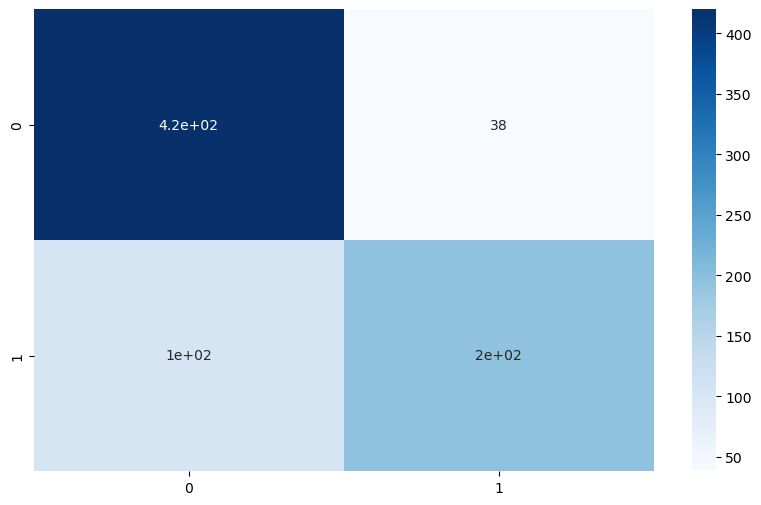

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(confmx_clf, annot=True, cmap='Blues')
plt.show()

In [59]:
xgbc_Pred_test = xgbc.predict(X=x_test_final)
xgbc_Pred_test

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1])

In [60]:
accuracy_score(y_test, xgbc_Pred_test)

0.8731343283582089

In [61]:
confmx_xgbc_test = confusion_matrix(y_test, xgbc_Pred_test)
confmx_xgbc_test

array([[83,  8],
       [ 9, 34]], dtype=int64)

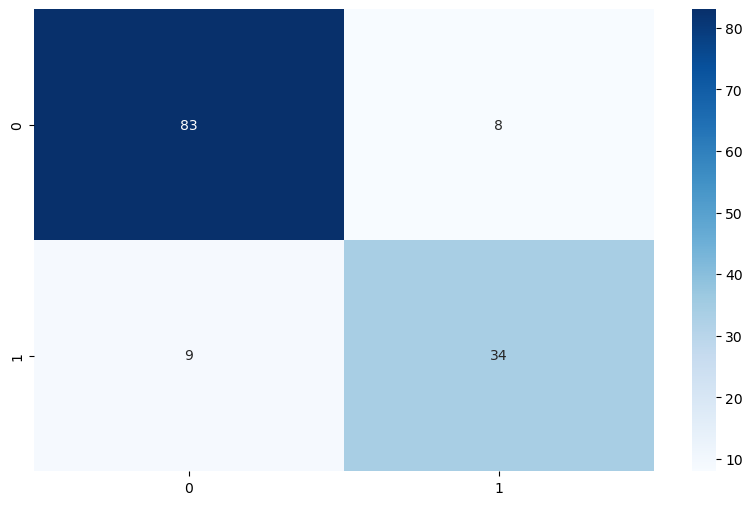

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(confmx_xgbc_test, annot=True, cmap='Blues')
plt.show()

In [64]:
xgbc_Pred_test_final = xgbc.predict(X=x_tstdst_final)
xgbc_Pred_test_final

output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': xgbc_Pred_test_final})
output.to_csv('submission.csv', index=False)